<a href="https://colab.research.google.com/github/oscarwoodi/Oscar_Wooding_Google_PythonProject/blob/main/BuyTheDip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description: This program uses the dual moving average crossover to determine when to buy and sell stock

In [48]:
#Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')

In [49]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving VUSA.AS (2).csv to VUSA.AS (2).csv


In [51]:
#Store the data
S = pd.read_csv('VUSA.AS (2).csv')

S

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-03,40.318001,40.528000,40.318001,40.477001,40.477001,230240.0
1,2017-02-06,40.556000,40.719002,40.556000,40.648998,40.648998,209188.0
2,2017-02-07,40.799999,40.980000,40.799999,40.840000,40.840000,88885.0
3,2017-02-08,40.986000,41.015999,40.638000,40.770000,40.770000,43212.0
4,2017-02-09,40.886002,41.209999,40.778000,41.209999,41.209999,321218.0
...,...,...,...,...,...,...,...
1274,2022-01-27,73.054001,75.327003,72.938004,74.903999,74.903999,123425.0
1275,2022-01-28,74.078003,74.246002,72.800003,74.071999,74.071999,123987.0
1276,2022-01-31,NaN,NaN,NaN,NaN,NaN,NaN
1277,2022-02-01,NaN,NaN,NaN,NaN,NaN,NaN


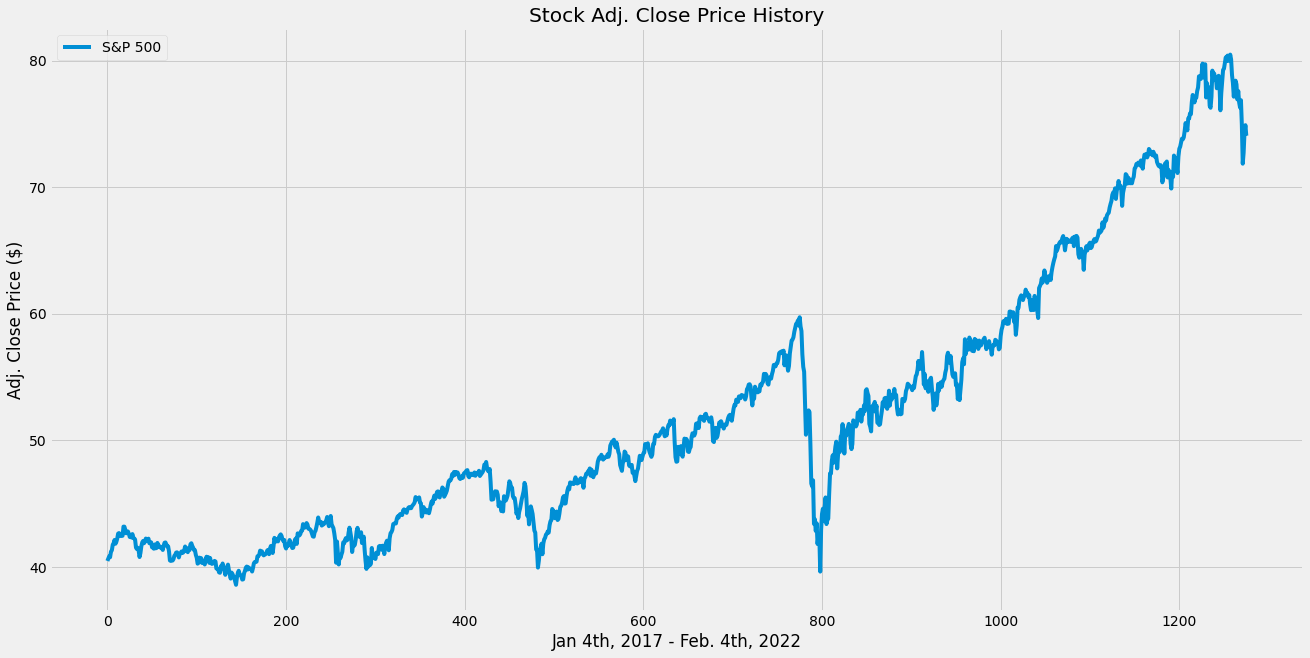

In [54]:
#Visualise the data
plt.figure(figsize=(20, 10))
plt.plot(S['Adj Close'], label='S&P 500')
plt.title('Stock Adj. Close Price History')
plt.xlabel('Jan 4th, 2017 - Feb. 4th, 2022')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()


In [94]:
#Identify the annualised volatility
max = pd.DataFrame()
min = pd.DataFrame()
mean = pd.DataFrame()
vol = pd.DataFrame()
percentage_vol = pd.DataFrame()
max['Adj. Close Price'] = S['Adj Close'].rolling(window = 10).max()
min['Adj. Close Price'] = S['Adj Close'].rolling(window = 100).min()
mean['Adj. Close Price'] = S['Adj Close'].rolling(window = 10).mean()
vol['Adj. Close Price'] = S['Adj Close'].rolling(window = 30).std()
percentage_vol['Adj. Close Price'] = vol['Adj. Close Price']/S['Adj Close']


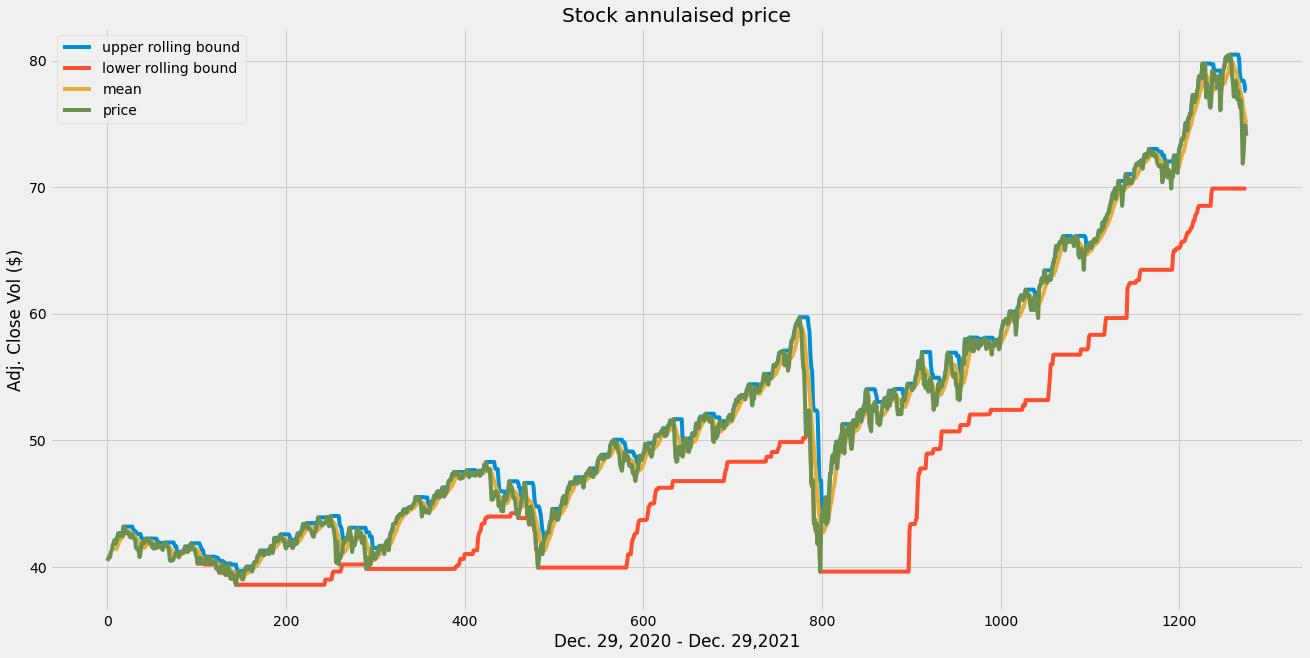

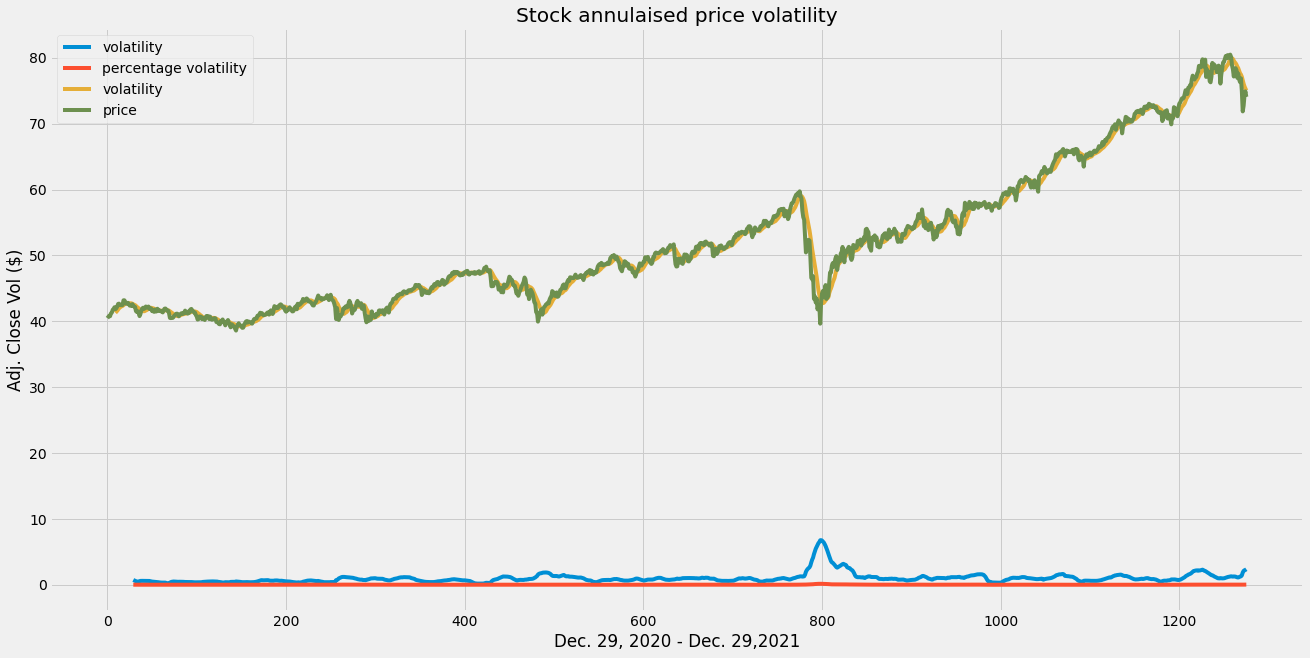

In [96]:
#Visualise the data
plt.figure(figsize=(20, 10))
plt.plot(max['Adj. Close Price'], label='upper rolling bound')
plt.plot(min['Adj. Close Price'], label='lower rolling bound')
plt.plot(mean['Adj. Close Price'], label='mean')
plt.plot(S['Adj Close'], label='price')
plt.title('Stock annulaised price')
plt.xlabel('Dec. 29, 2020 - Dec. 29,2021')
plt.ylabel('Adj. Close Vol ($)')
plt.legend(loc='upper left')
plt.show()



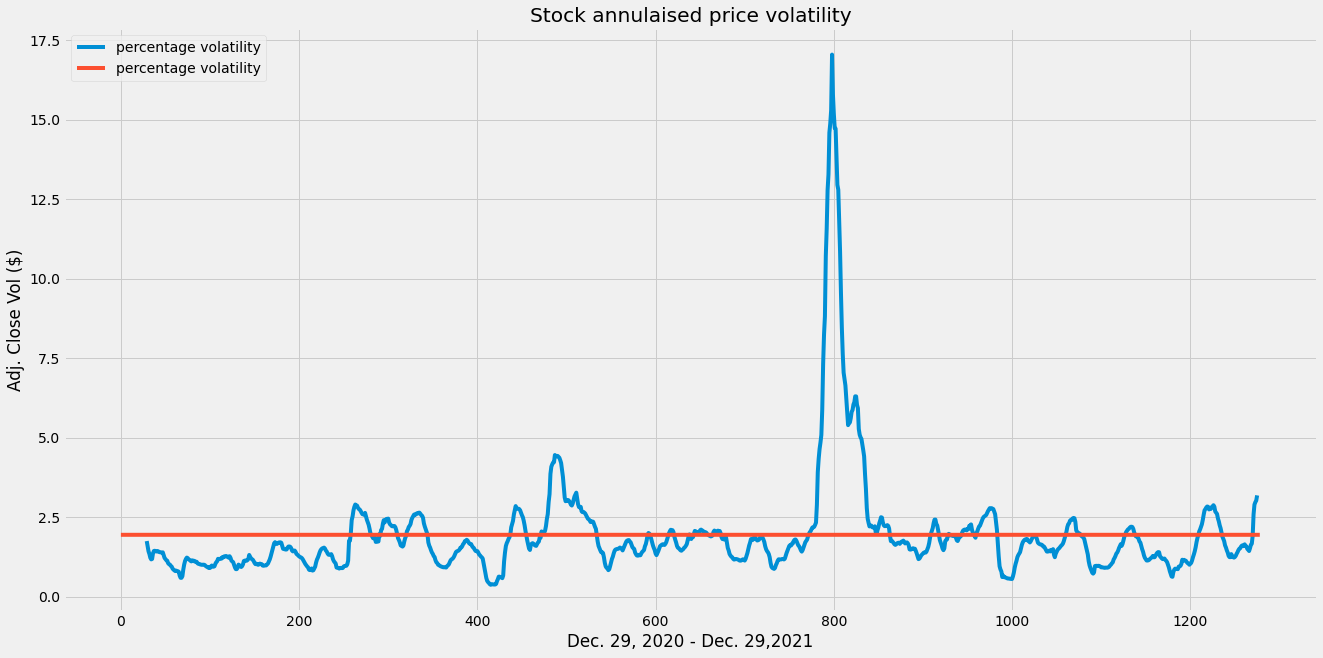

1.947949742832147

In [108]:
# Visualise volatility data to choose appropriate dip

plt.figure(figsize=(20, 10))
plt.plot(100*percentage_vol['Adj. Close Price'], label='percentage volatility')
plt.plot(percentage_vol.index, np.ones(percentage_vol.index.size)*100*percentage_vol['Adj. Close Price'].mean(), label='percentage volatility')
plt.title('Stock annulaised price volatility')
plt.xlabel('Dec. 29, 2020 - Dec. 29,2021')
plt.ylabel('Adj. Close Vol ($)')
plt.legend(loc='upper left')
plt.show()

100*percentage_vol['Adj. Close Price'].mean()

In [125]:
# finding turning points

###############################################################################
# Rules:
# 1. Peak must be reached in 30 days prior to trade
# 2. Trade is executed at peak -4%
# 3. Trade is tripled at peak -8%
# 4. Trade is closed at +8%
###############################################################################

# Finding peaks in stock price
Peaks = pd.DataFrame()
Peaks['Adj. Close Price'] = S['Adj Close'].rolling(window = 20).max()

def buy_sell(data,rule1,rule2, rule3, SL):

# rule 1 = dip % before placing trade

  sigPriceBuy = []
  sigPriceSell = []

  # rule 1
  setup = 0
  high = 0

  flag = 0 # no open trade

  for n in range(data['Adj Close'].size):
  
    high = Peaks['Adj. Close Price'][n]

    if (flag == 0) and (data['Adj Close'][n]<0.01*(100-rule1)*high):
      sigPriceBuy.append(data['Adj Close'][n])
      trade_level = data['Adj Close'][n]

      sigPriceSell.append(np.nan)
      flag = 1
    elif (flag == 1) and (data['Adj Close'][n]<0.01*(100-rule2)*high):
      sigPriceBuy.append(data['Adj Close'][n])
      sigPriceSell.append(np.nan)
      flag = 2
    elif ((flag != 0) and (data['Adj Close'][n]>(1+0.01*(rule3))*trade_level)) or ((flag != 0) and (data['Adj Close'][n]<0.01*(100-SL)*trade_level)):
      sigPriceSell.append(data['Adj Close'][n])
      sigPriceBuy.append(np.nan)
      flag = 0
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)

buy_sell_data = buy_sell(S, 2.88, 8, 7, 100)

data = pd.DataFrame()
data['TSLA'] = S['Adj Close']
data['Buy_Signal_Price'] = buy_sell_data[0]
data['Sell_Signal_Price'] = buy_sell_data[1]
data




,TSLA,Buy_Signal_Price,Sell_Signal_Price
0,40.477001,NaN,NaN
1,40.648998,NaN,NaN
2,40.840000,NaN,NaN
3,40.770000,NaN,NaN
4,41.209999,NaN,NaN
...,...,...,...
1274,74.903999,NaN,NaN
1275,74.071999,NaN,NaN
1276,NaN,NaN,NaN
1277,NaN,NaN,NaN


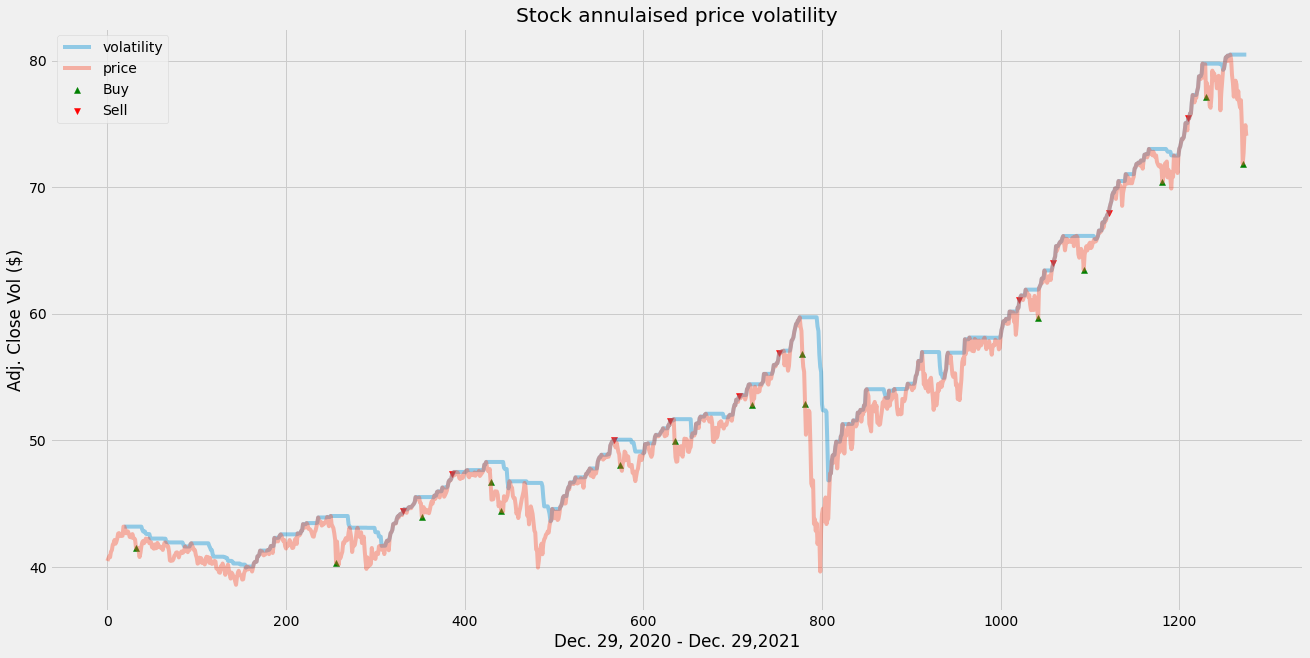

In [126]:
#Visualise the data
plt.figure(figsize=(20, 10))
plt.plot(Peaks['Adj. Close Price'], label='volatility', alpha=0.4)
plt.plot(S['Adj Close'], label='price', alpha=0.4)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title('Stock annulaised price volatility')
plt.xlabel('Dec. 29, 2020 - Dec. 29,2021')
plt.ylabel('Adj. Close Vol ($)')
plt.legend(loc='upper left')
plt.show()

In [128]:
#Calculating returns

def Backtest(data):
  runningProfit = []

  flag = -1
  nan_data = data.fillna(0)
  floor = 0
  floor_next = 0
  for i in range(len(data)):
    floor = floor_next
    if flag != 1:
      if nan_data['Buy_Signal_Price'][i] != 0:
        flag = 1
        buy = data['TSLA'][i]
        profit_Percentage = 0
      else:
        profit_Percentage = 0
    if flag == 1:
      if nan_data['Sell_Signal_Price'][i] != 0:
        flag = 0
        profit_Percentage = 100*(data['TSLA'][i] / buy - 1)*(100+floor)/100
        floor_next = profit_Percentage + floor
      else:
        profit_Percentage = 100*(data['TSLA'][i] / buy - 1)*(100+floor)/100
    runningProfit.append(profit_Percentage+floor)
    
  End_Profit = runningProfit[-1]
  return runningProfit, End_Profit

Simple_Profit = 100*(data['TSLA']/data['TSLA'][0]-1)
Profit = Backtest(data)[0]+Simple_Profit[20]

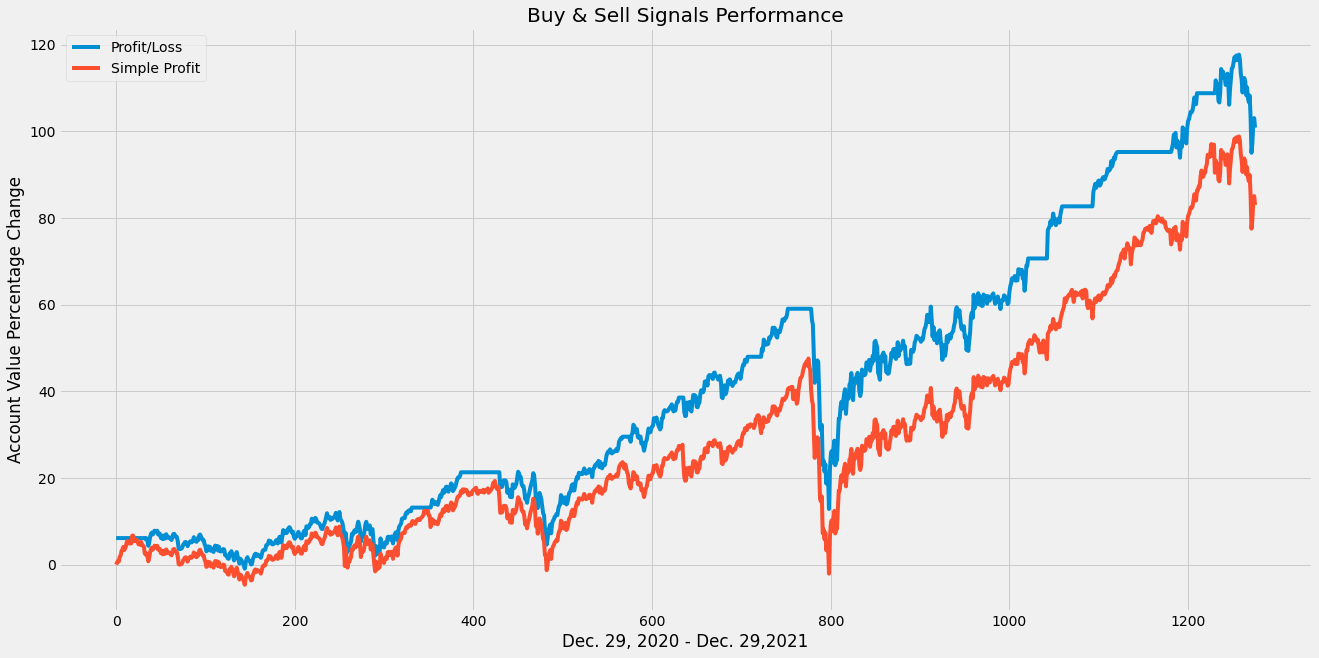

In [129]:
#Visualise the profit from the strategy
plt.figure(figsize=(20, 10))
plt.plot(data.index, Profit,  label='Profit/Loss')
plt.plot(Simple_Profit,  label='Simple Profit')
plt.title('Buy & Sell Signals Performance')
plt.xlabel('Dec. 29, 2020 - Dec. 29,2021')
plt.ylabel('Account Value Percentage Change')
plt.legend(loc='upper left')
plt.show()